<a href="https://colab.research.google.com/github/datascience-vivek/Decision_Tree/blob/main/Decision_Tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv("https://raw.githubusercontent.com/Sagar-modelling/ML_Live_Class/main/data/penguins_size.csv")

In [3]:
df.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


In [6]:
df['culmen_length_mm'] = df['culmen_length_mm'].fillna(0)
df['flipper_length_mm'] = df['flipper_length_mm'].fillna(0)
df['culmen_depth_mm'] = df['culmen_depth_mm'].fillna(0)
df['body_mass_g'] = df['body_mass_g'].fillna(0)
df['sex'] = df['sex'].fillna('None')

In [7]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [8]:
df['island'].unique()

array(['Torgersen', 'Biscoe', 'Dream'], dtype=object)

In [9]:
df['sex'].unique()

array(['MALE', 'FEMALE', 'None', '.'], dtype=object)

In [10]:
df[df['sex'] == '.']

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,.


In [11]:
df[df['species'] == 'Gentoo'].groupby('sex').describe().transpose()

sex                           .       FEMALE         MALE         None
culmen_length_mm  count     1.0    58.000000    61.000000     4.000000
                  mean     44.5    45.563793    49.473770    34.500000
                  std       NaN     2.051247     2.720594    23.028823
                  min      44.5    40.900000    44.400000     0.000000
                  25%      44.5    43.850000    48.100000    33.375000
                  50%      44.5    45.500000    49.500000    45.350000
                  75%      44.5    46.875000    50.500000    46.475000
                  max      44.5    50.500000    59.600000    47.300000
culmen_depth_mm   count     1.0    58.000000    61.000000     4.000000
                  mean     15.7    14.237931    15.718033    10.625000
                  std       NaN     0.540249     0.741060     7.088194
                  min      15.7    13.100000    14.100000     0.000000
                  25%      15.7    13.800000    15.200000    10.350000
                  50%      15.7    14.250000    15.700000    14.050000
                  75%      15.7    14.600000    16.100000    14.325000
                  max      15.7    15.500000    17.300000    14.400000
flipper_length_mm count     1.0    58.000000    61.000000     4.000000
                  mean    217.0   212.706897   221.540984   161.500000
                  std       NaN     3.897856     5.673252   107.670795
                  min     217.0   203.000000   208.000000     0.000000
                  25%     217.0   210.000000   218.000000   160.500000
                  50%     217.0   212.000000   221.000000   215.000000
                  75%     217.0   215.000000   225.000000   216.000000
                  max     217.0   222.000000   231.000000   216.000000
body_mass_g       count     1.0    58.000000    61.000000     4.000000
                  mean   4875.0  4679.741379  5484.836066  3368.750000
                  std       NaN   281.578294   313.158596  2263.052419
                  min    4875.0  3950.000000  4750.000000     0.000000
                  25%    4875.0  4462.500000  5300.000000  3075.000000
                  50%    4875.0  4700.000000  5500.000000  4375.000000
                  75%    4875.0  4875.000000  5700.000000  4668.750000
                  max    4875.0  5200.000000  6300.000000  4725.000000

In [12]:
df.at[336,'sex'] = 'FEMALE'

In [13]:
df.loc[336]

species              Gentoo
island               Biscoe
culmen_length_mm       44.5
culmen_depth_mm        15.7
flipper_length_mm     217.0
body_mass_g          4875.0
sex                  FEMALE
Name: 336, dtype: object

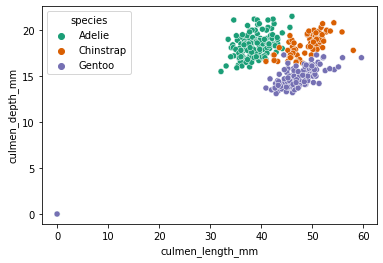

In [14]:
sns.scatterplot(x='culmen_length_mm', y= 'culmen_depth_mm', data=df, hue= 'species', palette= 'Dark2')

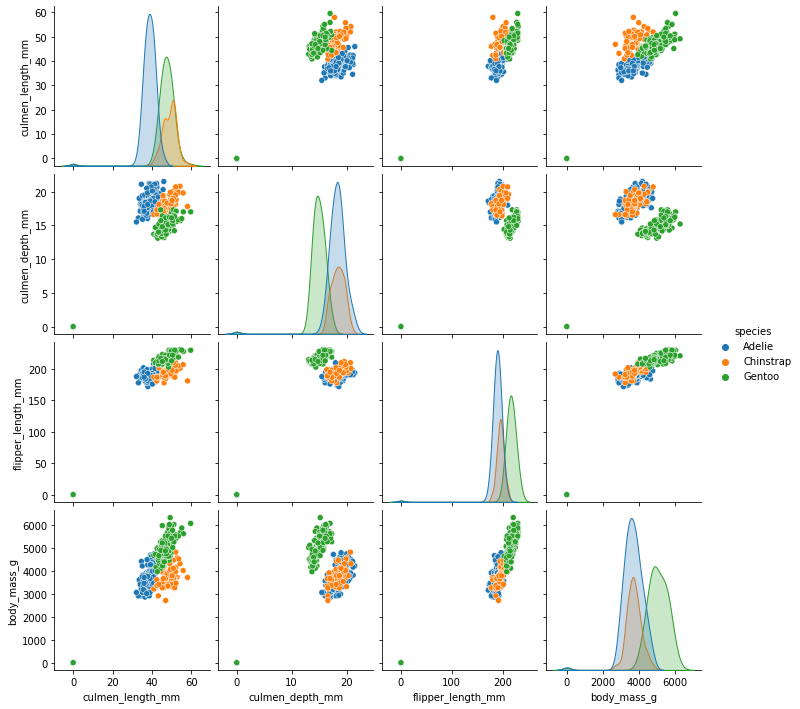

In [15]:
sns.pairplot(df, hue='species')

In [16]:
df.isnull().sum()

species              0
island               0
culmen_length_mm     0
culmen_depth_mm      0
flipper_length_mm    0
body_mass_g          0
sex                  0
dtype: int64

In [17]:
X= pd.get_dummies(df.drop('species', axis=1), drop_first= True)

In [18]:
y = df['species']

In [19]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, = train_test_split(X,y, test_size=0.3, random_state= 101)

In [20]:
from sklearn.tree import DecisionTreeClassifier

In [21]:
model = DecisionTreeClassifier()

In [22]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [25]:
model_preds = model.predict(X_test)

model_preds

array(['Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap',
       'Chinstrap', 'Chinstrap', 'Chinstrap', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Chinstrap',
       'Chinstrap', 'Adelie', 'Chinstrap', 'Chinstrap', 'Adelie',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Gentoo', 'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo',
       'Gentoo', 'Gentoo', 'Chinstrap', 'Adelie', 'Adelie', 'Adelie',
       'Adelie', 'Adelie', 'Gentoo', 'Adelie', 'Adelie', 'Adelie',
       'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adelie', 'Adelie', 'Chinstrap', 'Gentoo', 'Adelie',
       'Chinstrap', 'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie',
       'Chinstrap', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo', 'Gentoo',
       'Adelie', 'Adelie', 'Gentoo', 'Chinstrap', 'Adelie', 'Gentoo',
       'Gentoo', 'Gentoo', 'Gentoo', 'Chinstrap', 'Chinstrap', 'Gentoo',
       'Adelie', 'Adel

In [26]:
from sklearn.metrics import classification_report, plot_confusion_matrix

In [28]:
print(classification_report(y_test, model_preds))

              precision    recall  f1-score   support

      Adelie       0.95      1.00      0.98        41
   Chinstrap       1.00      1.00      1.00        26
      Gentoo       1.00      0.95      0.97        37

    accuracy                           0.98       104
   macro avg       0.98      0.98      0.98       104
weighted avg       0.98      0.98      0.98       104



/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function plot_confusion_matrix is deprecated; Function `plot_confusion_matrix` is deprecated in 1.0 and will be removed in 1.2. Use one of the class methods: ConfusionMatrixDisplay.from_predictions or ConfusionMatrixDisplay.from_estimator.
  warnings.warn(msg, category=FutureWarning)


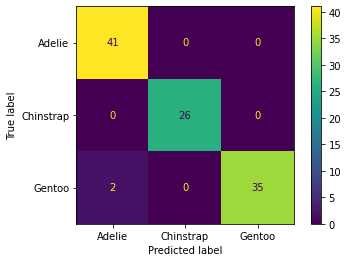

In [29]:
plot_confusion_matrix(model, X_test, y_test)

In [30]:
model.feature_importances_

array([0.34261138, 0.03164584, 0.5828475 , 0.        , 0.02286523,
       0.00667668, 0.01335336, 0.        ])

In [31]:
pd.DataFrame(index=X.columns, data= model.feature_importances_, columns = ['Feature Importance'])

,Feature Importance
culmen_length_mm,0.342611
culmen_depth_mm,0.031646
flipper_length_mm,0.582848
body_mass_g,0.000000
island_Dream,0.022865
island_Torgersen,0.006677
sex_MALE,0.013353
sex_None,0.000000


In [32]:
from sklearn.tree import plot_tree

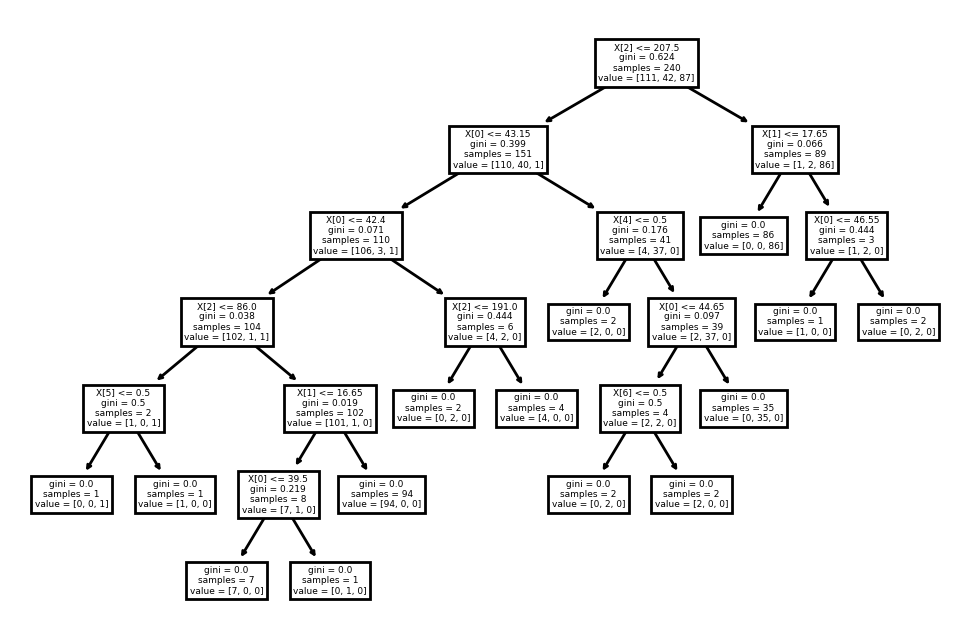

In [37]:
plt.figure(dpi= 200)
plot_tree(model);

In [38]:
len(X_train)

240

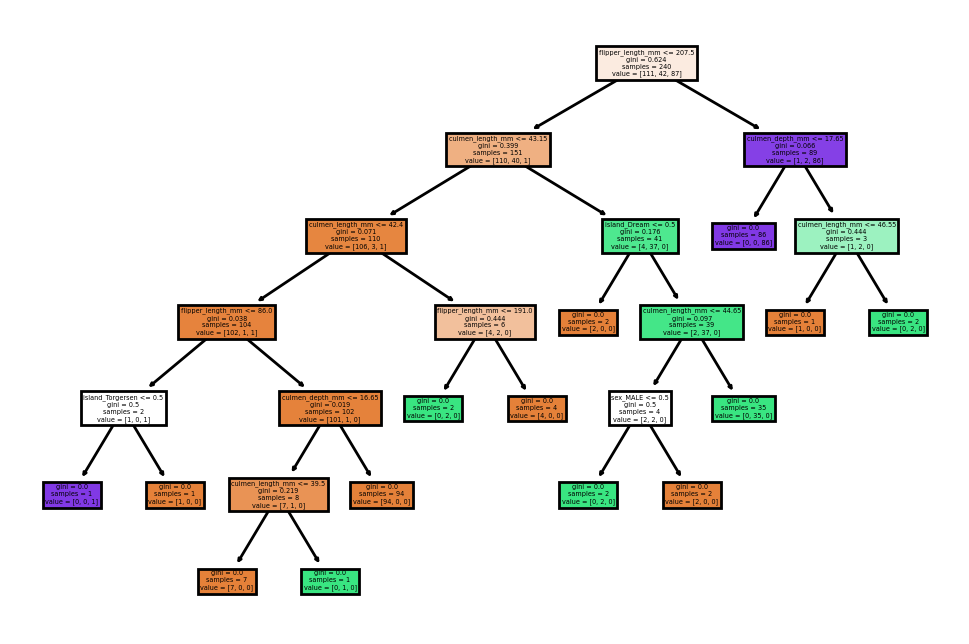

In [40]:
plt.figure(dpi= 200)
plot_tree(model, feature_names = X.columns, filled =True);

In [41]:
def report_model(model):##Explore the  Hyper parameter tuning
  print(classification_report(y_test, model_preds))
  print('\n')
  plt.figure(dpi=200)
  plot_tree(model, feature_names = X.columns, filled=True)

In [42]:
pruned_tree = DecisionTreeClassifier(max_depth=2)

In [43]:
pruned_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=2)

In [45]:
model_preds = pruned_tree.predict(X_test)

              precision    recall  f1-score   support

      Adelie       0.97      0.93      0.95        41
   Chinstrap       0.83      0.96      0.89        26
      Gentoo       1.00      0.95      0.97        37

    accuracy                           0.94       104
   macro avg       0.94      0.94      0.94       104
weighted avg       0.95      0.94      0.94       104





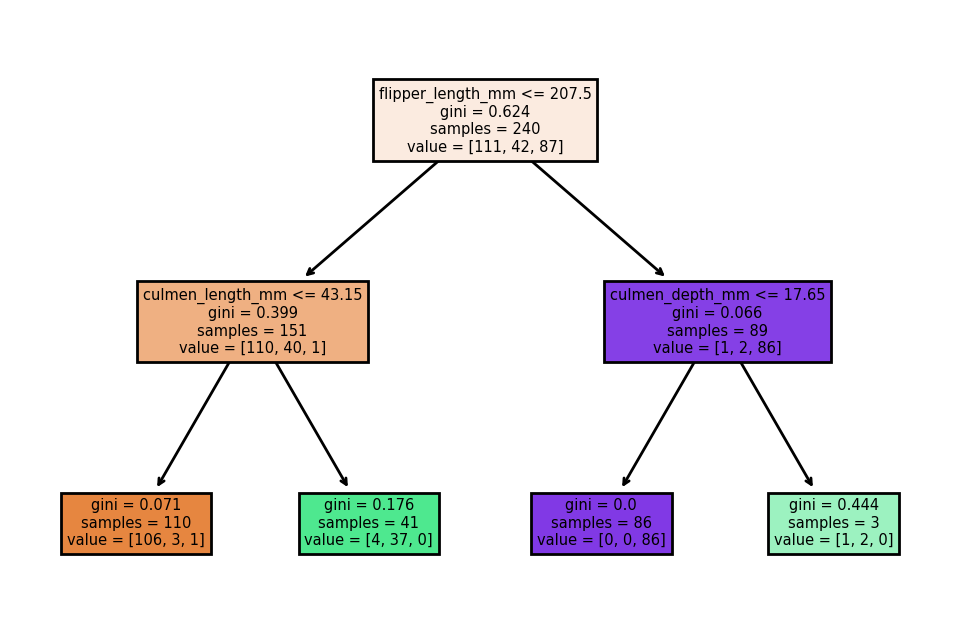

In [47]:
report_model(pruned_tree)

In [48]:
#To check the maximum no. of leaf nodes:
max_leaf_tree = DecisionTreeClassifier(max_leaf_nodes = 3)

In [49]:
max_leaf_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [51]:
model3_pred = max_leaf_tree.predict(X_test)

In [53]:
print(classification_report(y_test, model3_pred))

              precision    recall  f1-score   support

      Adelie       0.97      0.93      0.95        41
   Chinstrap       0.85      0.88      0.87        26
      Gentoo       0.92      0.95      0.93        37

    accuracy                           0.92       104
   macro avg       0.92      0.92      0.92       104
weighted avg       0.92      0.92      0.92       104



[Text(0.6, 0.8333333333333334, 'flipper_length_mm <= 207.5\ngini = 0.624\nsamples = 240\nvalue = [111, 42, 87]'),
 Text(0.4, 0.5, 'culmen_length_mm <= 43.15\ngini = 0.399\nsamples = 151\nvalue = [110, 40, 1]'),
 Text(0.2, 0.16666666666666666, 'gini = 0.071\nsamples = 110\nvalue = [106, 3, 1]'),
 Text(0.6, 0.16666666666666666, 'gini = 0.176\nsamples = 41\nvalue = [4, 37, 0]'),
 Text(0.8, 0.5, 'gini = 0.066\nsamples = 89\nvalue = [1, 2, 86]')]

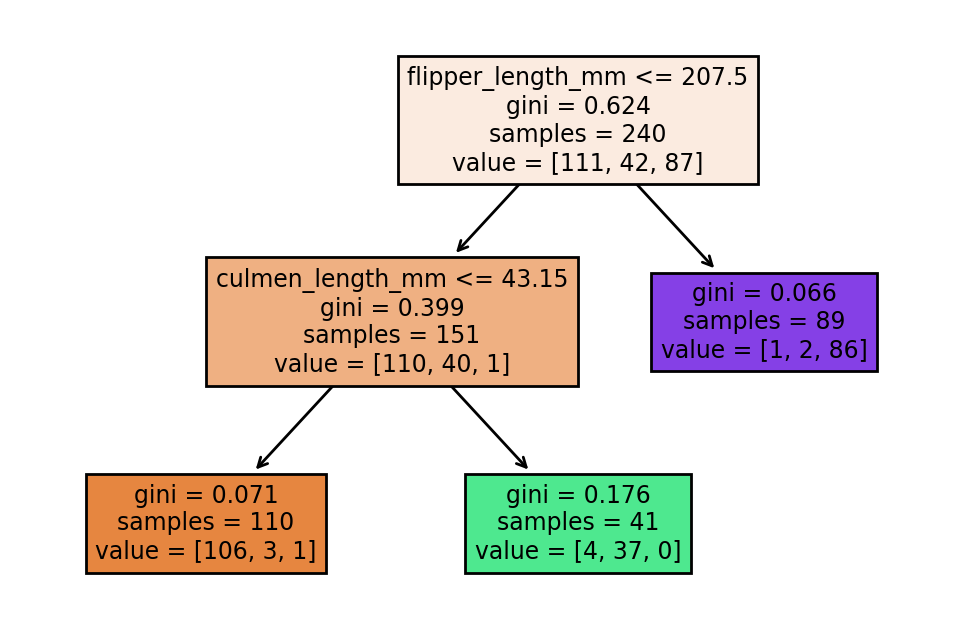

In [55]:
plt.figure(dpi=200)
plot_tree(max_leaf_tree, feature_names = X.columns, filled=True)

In [56]:
entropy_tree = DecisionTreeClassifier(criterion='entropy')

In [57]:
entropy_tree.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [58]:
model4_pred = entropy_tree.predict(X_test)

In [59]:
print(classification_report(y_test, model4_pred))

              precision    recall  f1-score   support

      Adelie       0.95      0.95      0.95        41
   Chinstrap       0.89      0.96      0.93        26
      Gentoo       1.00      0.95      0.97        37

    accuracy                           0.95       104
   macro avg       0.95      0.95      0.95       104
weighted avg       0.95      0.95      0.95       104



[Text(0.6710526315789473, 0.9285714285714286, 'flipper_length_mm <= 207.5\nentropy = 1.485\nsamples = 240\nvalue = [111, 42, 87]'),
 Text(0.5, 0.7857142857142857, 'culmen_length_mm <= 43.15\nentropy = 0.889\nsamples = 151\nvalue = [110, 40, 1]'),
 Text(0.3157894736842105, 0.6428571428571429, 'culmen_depth_mm <= 16.75\nentropy = 0.255\nsamples = 110\nvalue = [106, 3, 1]'),
 Text(0.21052631578947367, 0.5, 'culmen_length_mm <= 40.2\nentropy = 1.041\nsamples = 12\nvalue = [9, 2, 1]'),
 Text(0.15789473684210525, 0.35714285714285715, 'body_mass_g <= 1425.0\nentropy = 0.469\nsamples = 10\nvalue = [9, 0, 1]'),
 Text(0.10526315789473684, 0.21428571428571427, 'island_Torgersen <= 0.5\nentropy = 1.0\nsamples = 2\nvalue = [1, 0, 1]'),
 Text(0.05263157894736842, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [0, 0, 1]'),
 Text(0.15789473684210525, 0.07142857142857142, 'entropy = 0.0\nsamples = 1\nvalue = [1, 0, 0]'),
 Text(0.21052631578947367, 0.21428571428571427, 'entropy = 0.0\nsamples

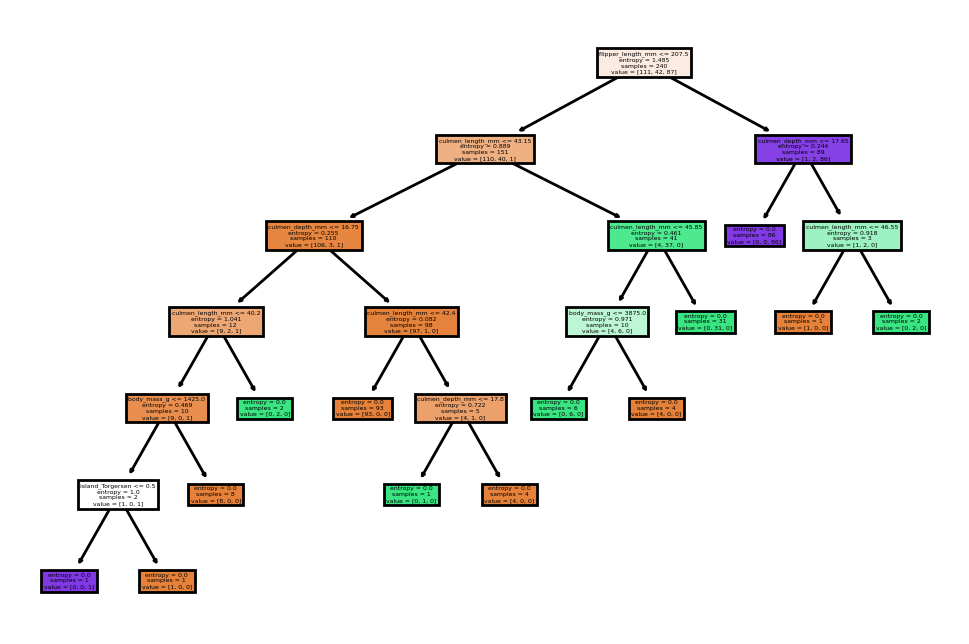

In [60]:
plt.figure(dpi=200)
plot_tree(entropy_tree, feature_names = X.columns, filled=True)